# FINAL PROJECT "STATISTICA FORTIS"

-Salsabila Nur Yasmin (Mentor)\
-Fikri Hadyan Kusuma (Project Manager)\
-Faris Ramadhan (Data Scientist)\
-Daan Zhafrullah (Business/Data Analyst)\
-Ihsan Muhammad (Data Engineer)

## Load Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('master_data.xlsx')

## Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [5]:
# Membuang fitur

df = df.drop(['EmployeeID', 'StandardHours', 'EmployeeCount'], axis=1)

## Univariate Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
categorical_features = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 
                        'JobRole', 'MaritalStatus', 'Education', 'JobLevel', 'StockOptionLevel', 'EnvironmentSatisfaction', 
                       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']

numeric_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

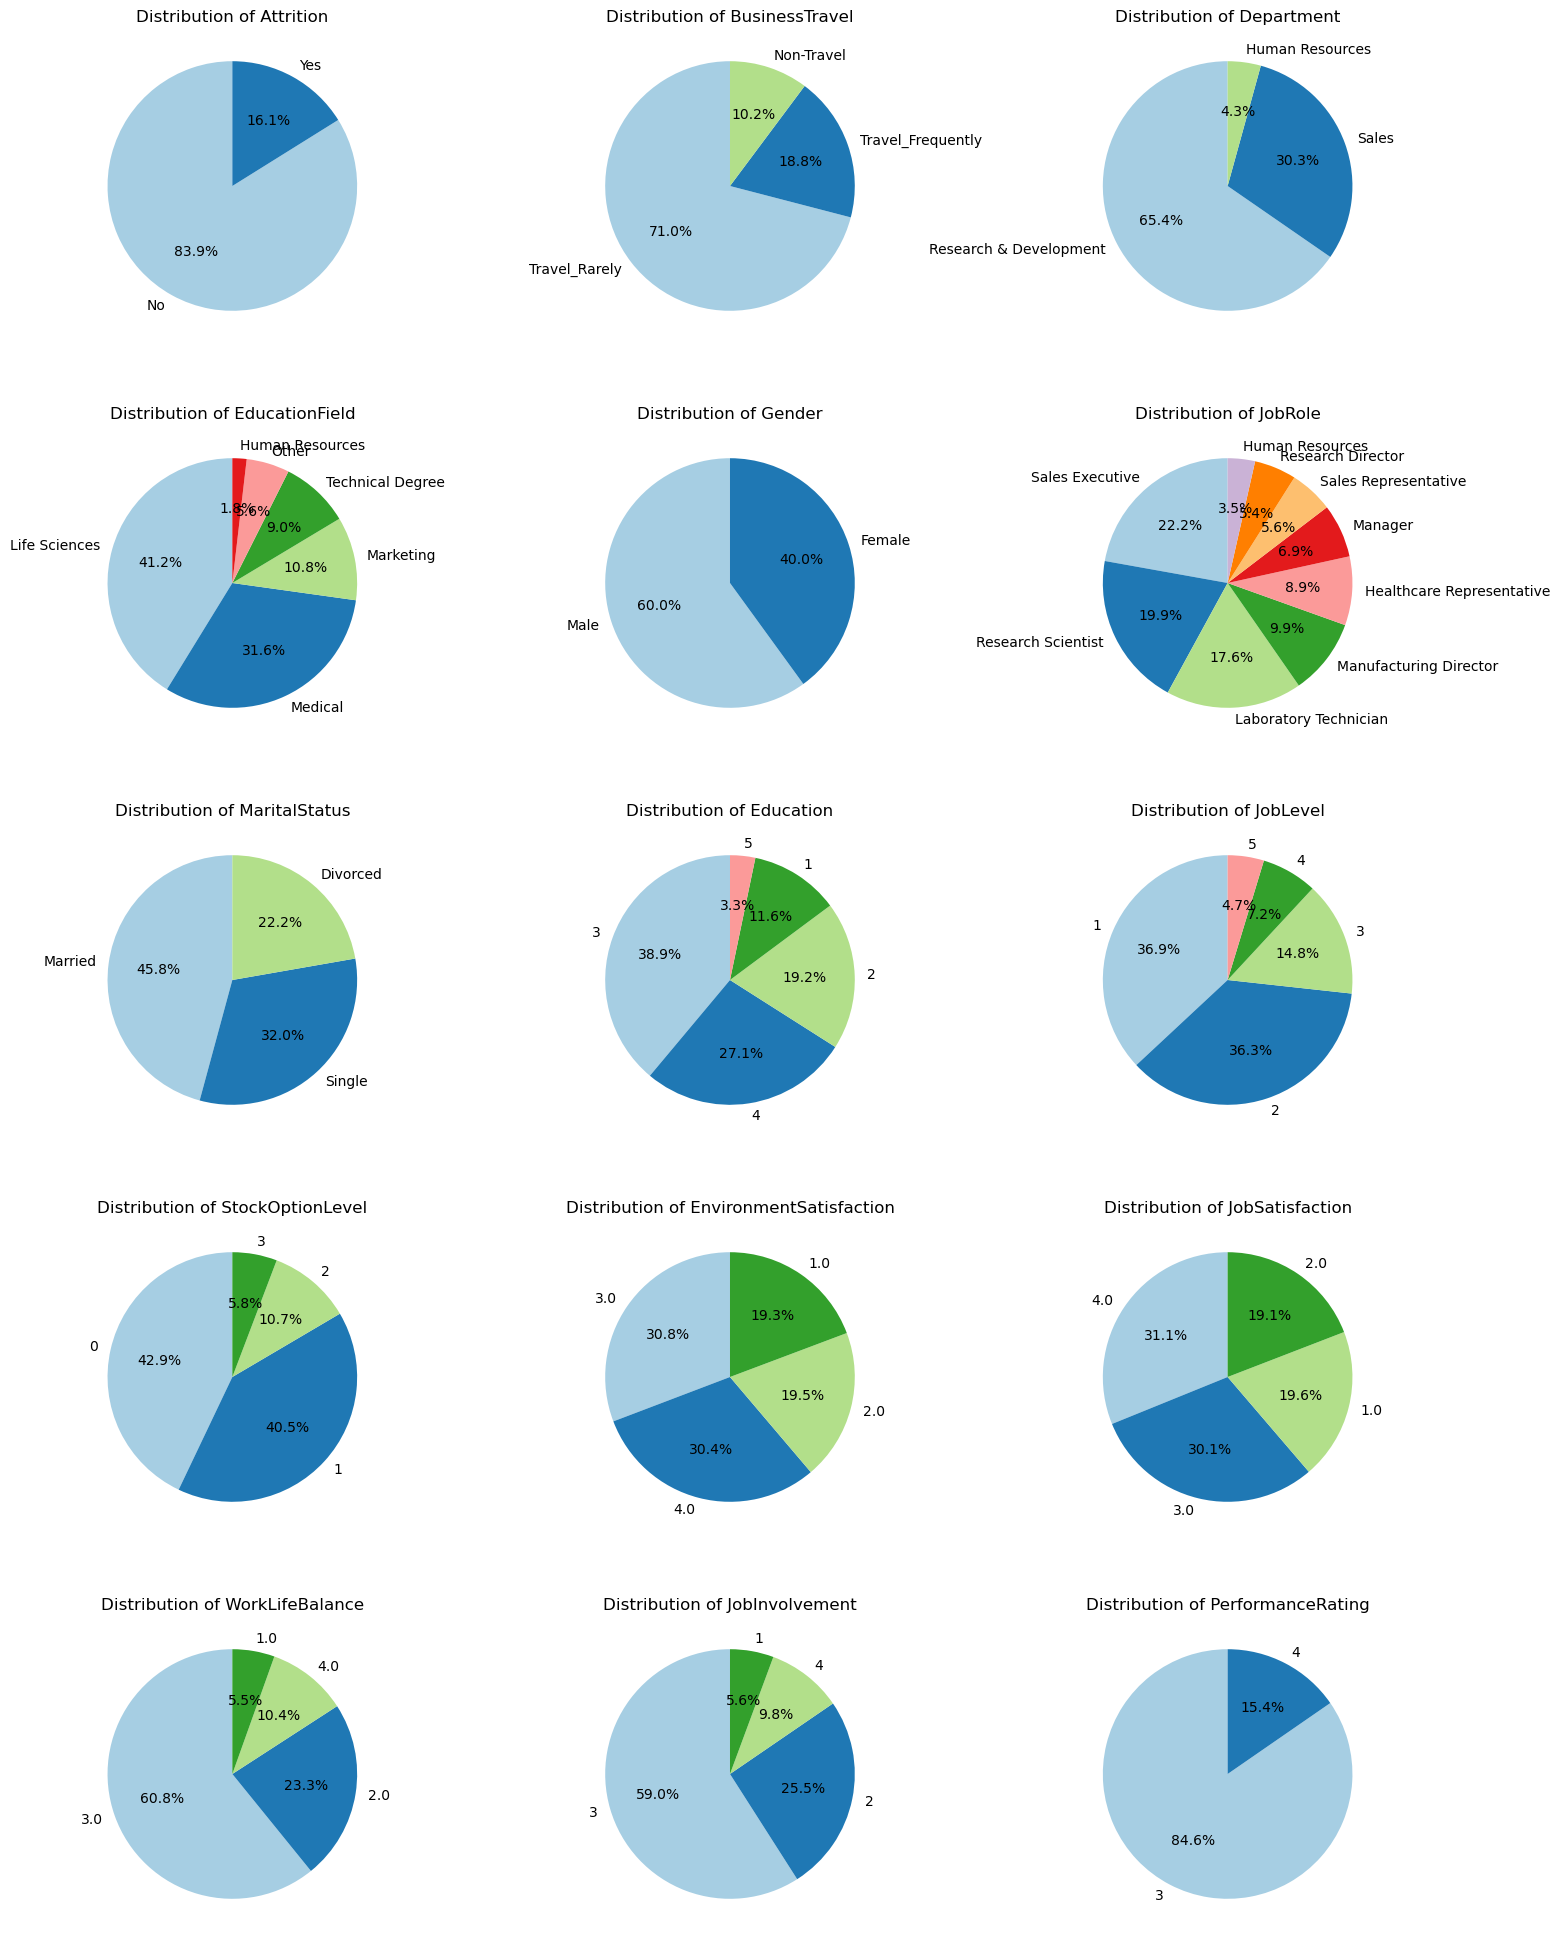

In [13]:
def plot_pie_charts(df, features):
    rows, cols = 5, 3
    fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
    
    for i, feature in enumerate(features):
        row, col = divmod(i, cols)
        ax = axes[row, col]
        df[feature].value_counts().plot.pie(
            ax=ax, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors
        )
        ax.set_title(f'Distribution of {feature}')
        ax.set_ylabel('')  
        
    for i in range(len(features), rows * cols):
        row, col = divmod(i, cols)
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

plot_pie_charts(df, categorical_features)

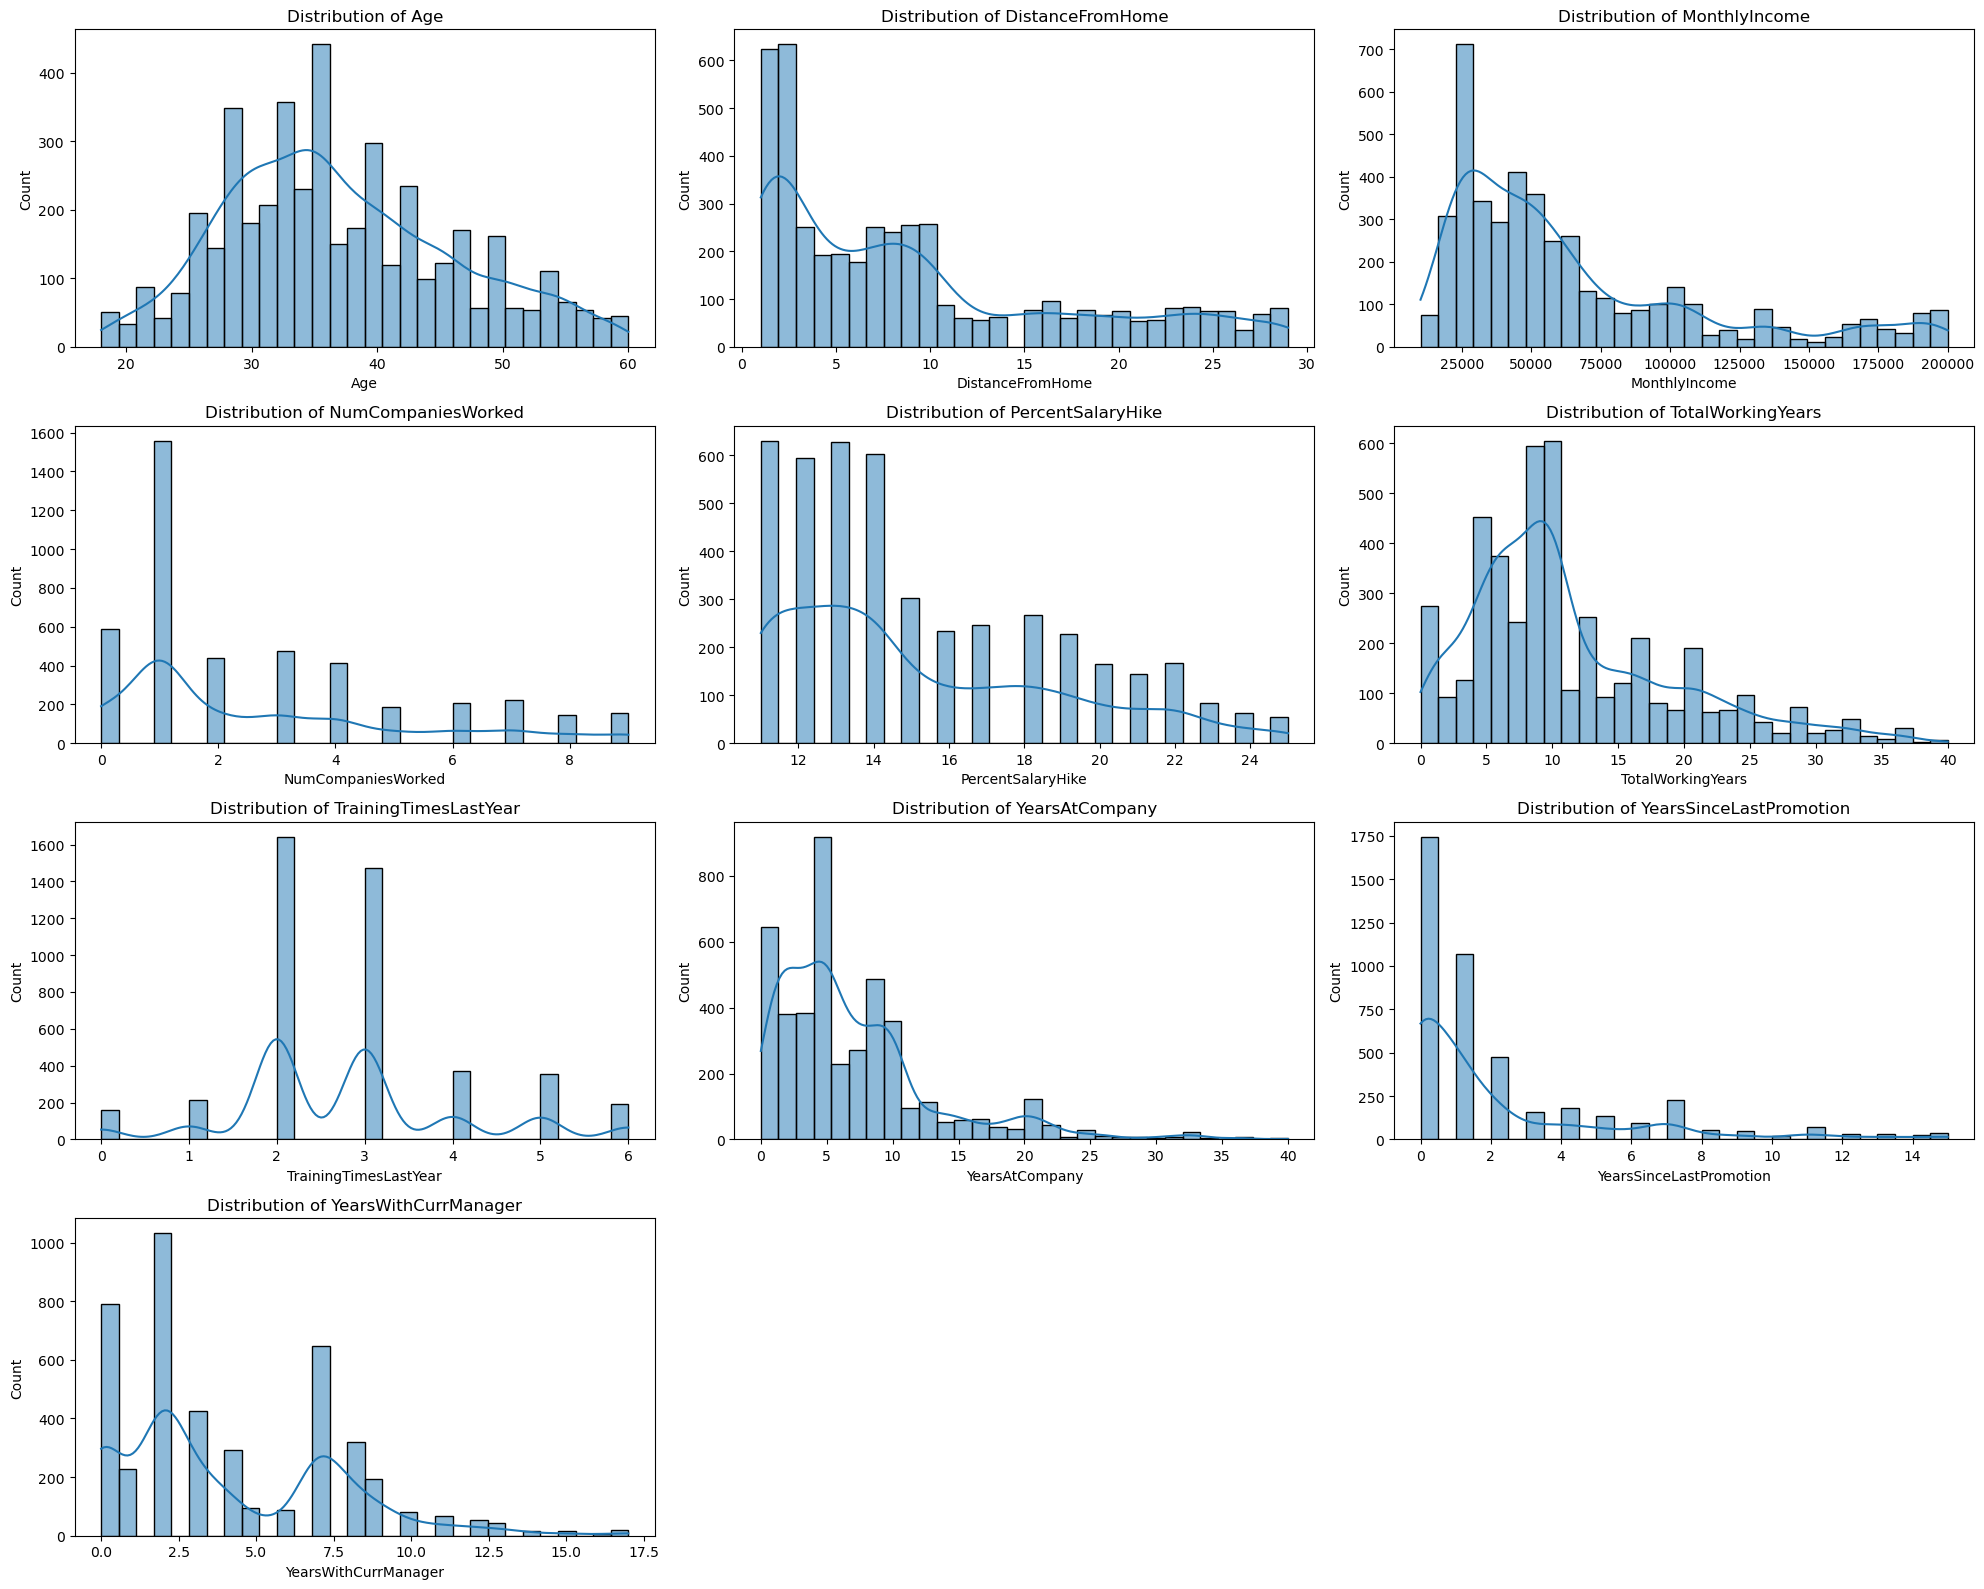

In [12]:
def plot_histograms(df, features):
    rows, cols = 4, 3
    fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
    
    for i, feature in enumerate(features):
        row, col = divmod(i, cols)
        ax = axes[row, col]
        sns.histplot(df[feature], kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution of {feature}")
    
    for i in range(len(features), rows * cols):
        row, col = divmod(i, cols)
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

plot_histograms(df, numeric_features)

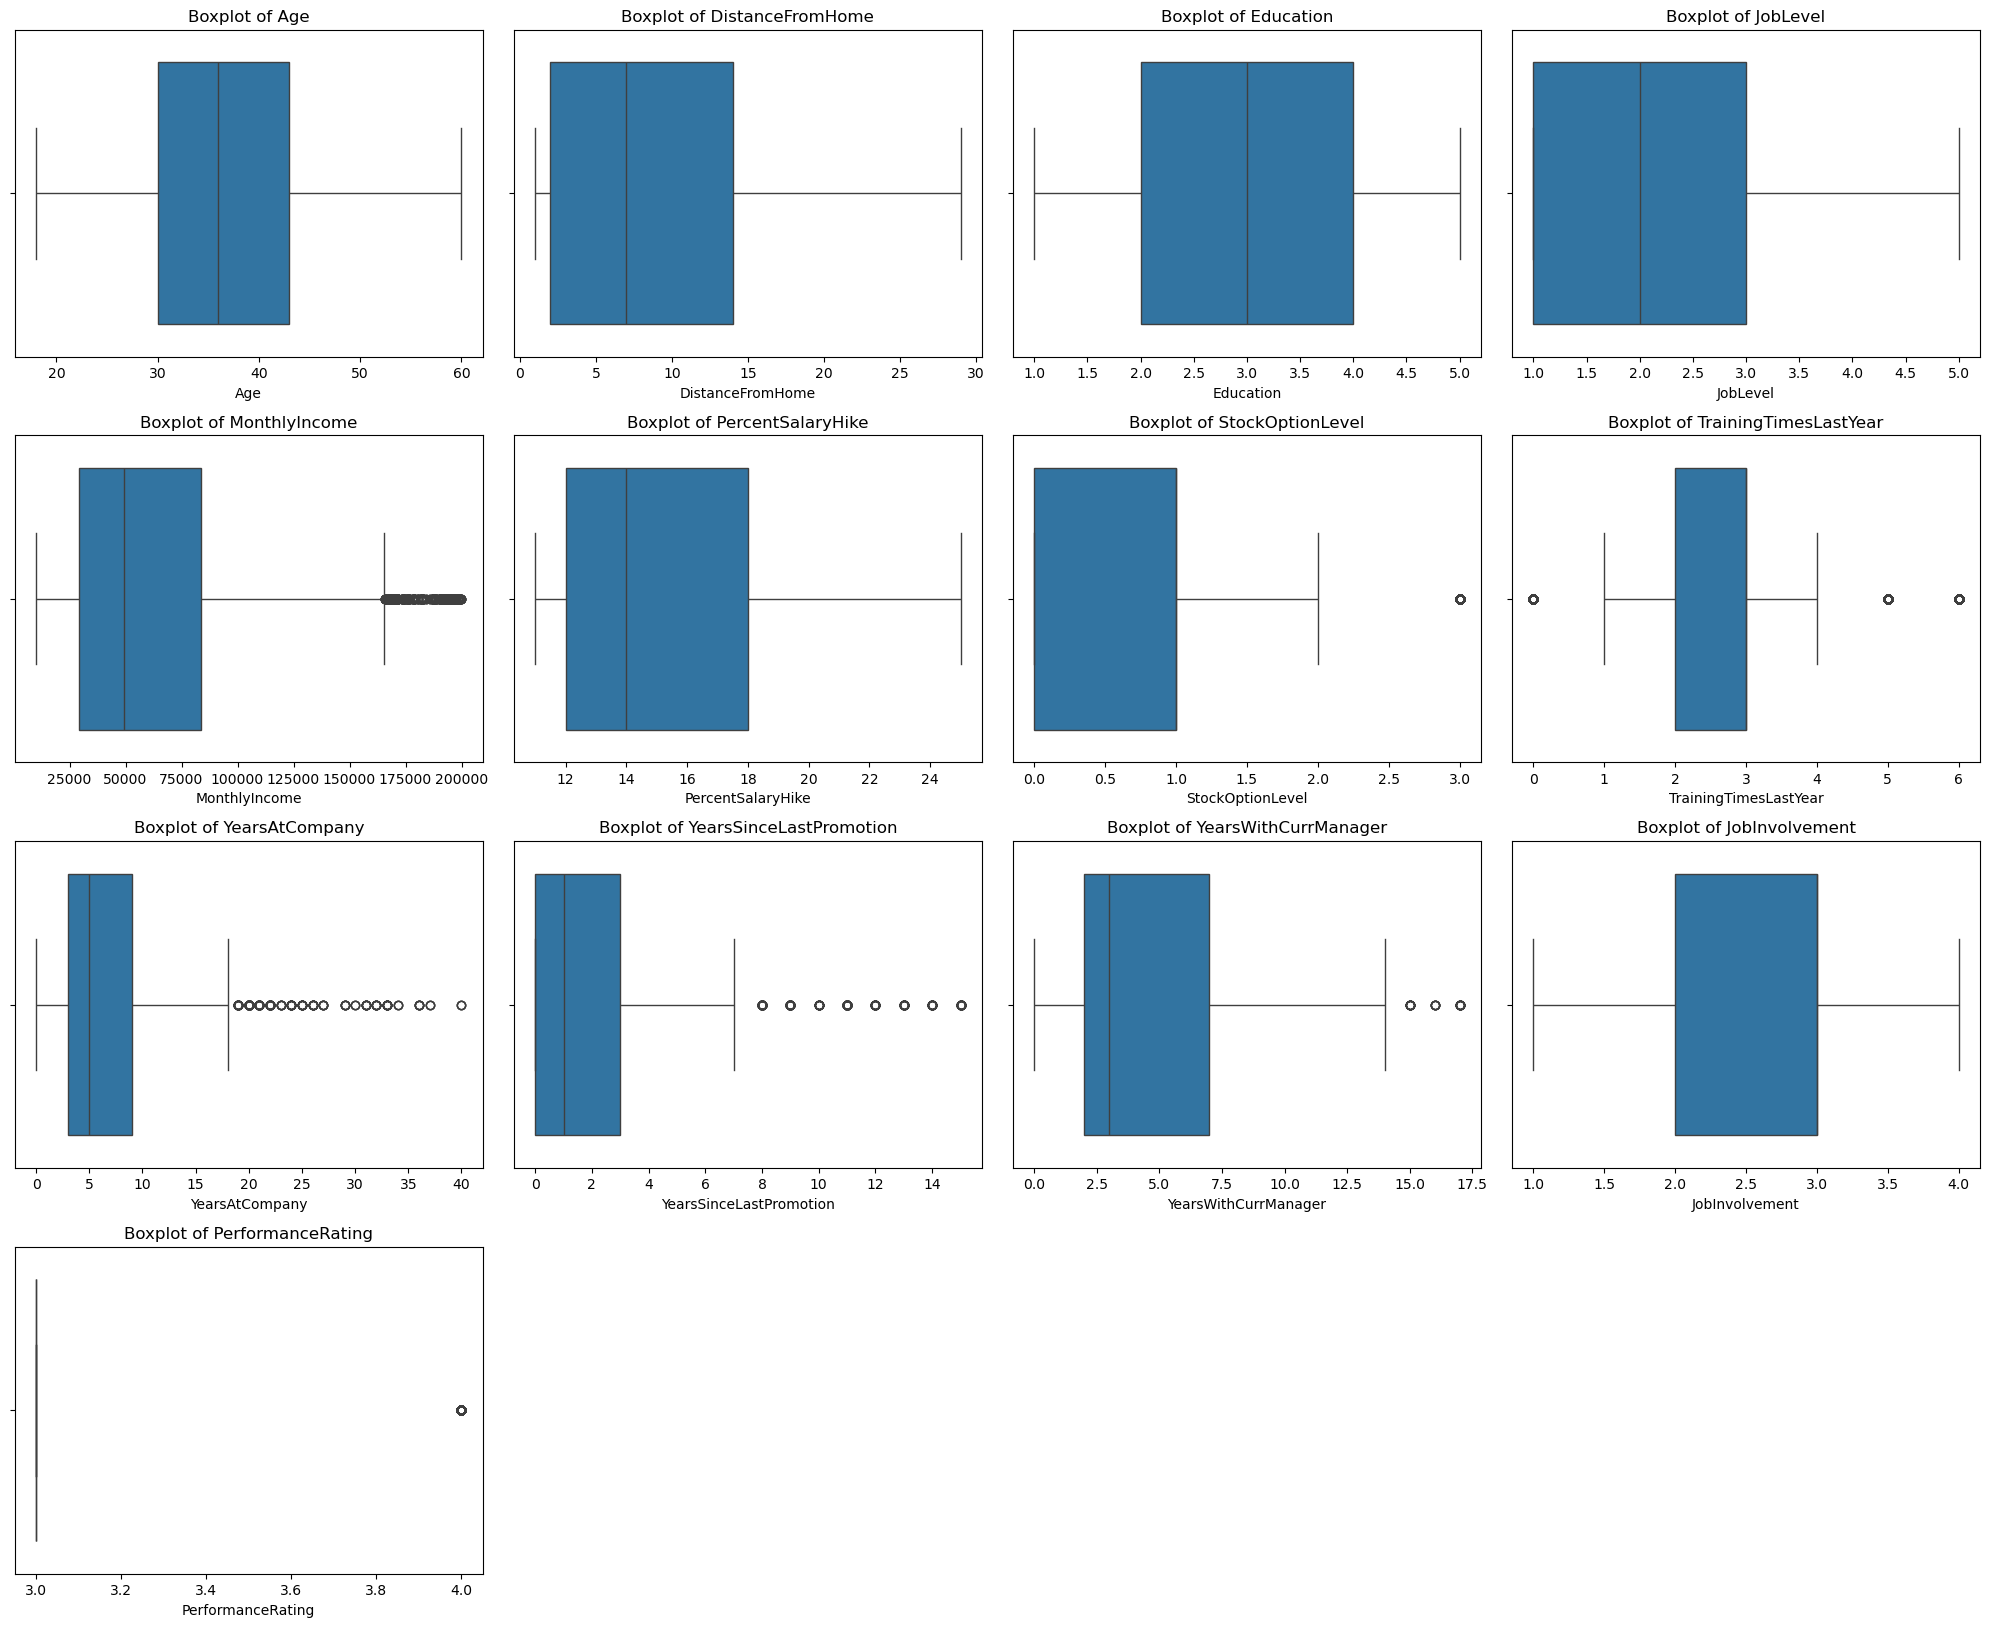

In [14]:
def plot_boxplots(df, features):
    rows, cols = 5, 4
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    
    for i, feature in enumerate(features):
        row, col = divmod(i, cols)
        ax = axes[row, col]
        sns.boxplot(data=df, x=feature, ax=ax)
        ax.set_title(f'Boxplot of {feature}')

    for i in range(len(features), rows * cols):
        row, col = divmod(i, cols)
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

plot_boxplots(df, boxplot_features)

## Multivariate Analysis

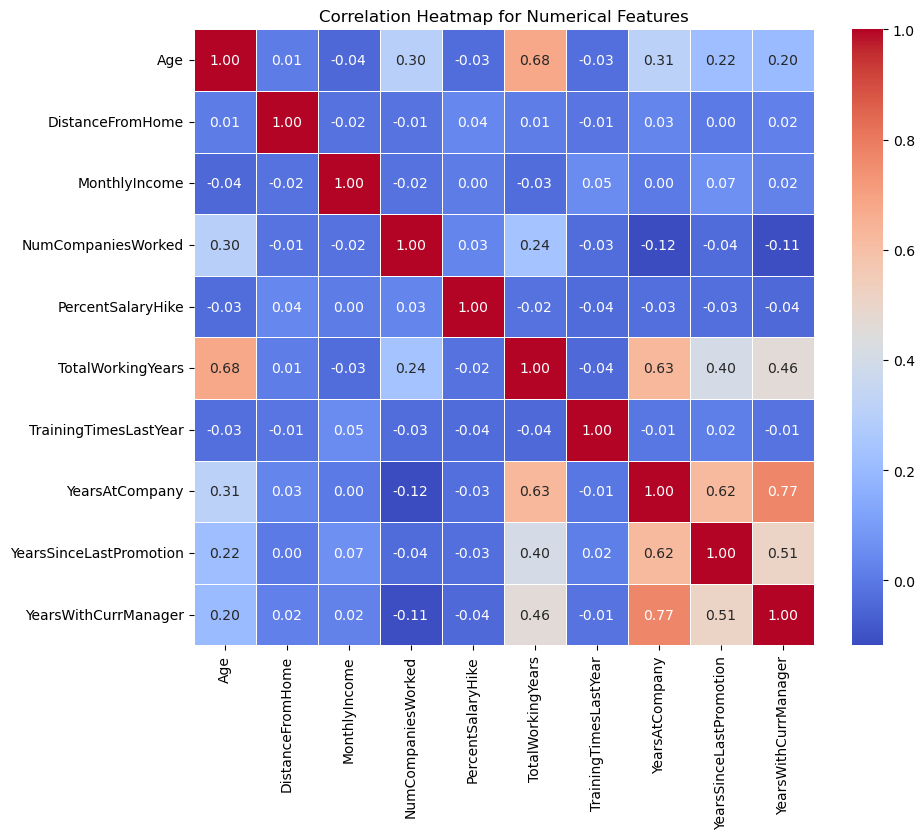

In [16]:
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()